<a href="https://colab.research.google.com/github/jezzipan/curiando/blob/master/2_Estacionariedade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

<img src="https://media.eadbox.com/system/uploads/saas/devise_logo/5e407cf9bf392e001feb33df/Logo%2010.PNG" width="100px" style="color:gray;" />

<h2>Trading com Dados </h2>

<hr>
<b>Curso</b> : Análise de Séries Temporais<br>
<b>Tópico</b> : Estacionariedade<br>
<b>Professor</b> : Robson Fernandes<br>
<hr>




<center>

### Instalação de Bibliotecas

In [0]:
pip install yfinance

#### Importação das Bibliotecas

In [0]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
import yfinance as yf

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('seaborn')

### Download do Conjunto De Dados - Petrobras

Nosso conjunto de dados será baseado nas ações da empresa Petróleo Brasileiro S.A. — Petrobras (PETR4.SA).

In [0]:
series_petr4 = yf.download("PETR4.SA", start="2015-01-01", end="2020-06-06")

[*********************100%***********************]  1 of 1 completed


In [0]:
series_petr4.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,9.99,9.99,9.35,9.36,8.683469,49559500
2015-01-05,9.14,9.19,8.53,8.56,7.941292,78385100
2015-01-06,8.71,8.83,8.04,8.28,7.681531,84723300
2015-01-07,8.56,8.73,8.36,8.67,8.043342,85531000
2015-01-08,8.79,9.39,8.74,9.23,8.562866,83306300


#### Visualização da Série Temporal - Dinâmica com Range por Data
#### OPEN (Preço de Abertura)

In [0]:
fig = px.line(series_petr4, 
              x=series_petr4.index, 
              y='Open', 
              labels={'x': 'Date'},
              title='Série Temporal - Ações Petróleo Brasileiro S.A. — Petrobras (PETR4.SA).')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### Análise Exploratória - Análise de Distribuição

Plotagem de um gráfico de histograma para avaliar se os dados possuem forma de sino da distribuição Gaussiana

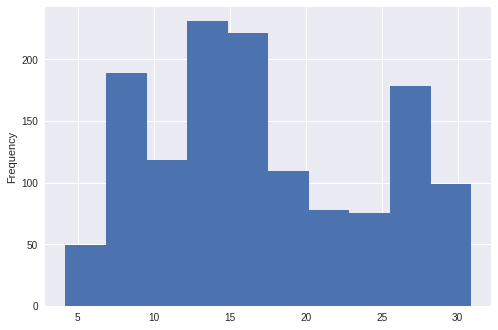

In [0]:
series_petr4["Open"].plot(kind="hist")
plt.show()

In [0]:
fig = px.histogram(series_petr4, 
                   x="Open",
                   title='Histograma - Série Temporal - Open (Preço de Abertura)')
fig.show()

### Teste - Augmented Dickey-Fuller

Os testes estatísticos fazem fortes suposições sobre seus dados. Eles só podem ser usados ​​para informar até que ponto uma hipótese nula pode ser rejeitada ou falha em ser rejeitada. O resultado deve ser interpretado para que um determinado problema seja significativo.

No entanto, eles podem fornecer uma verificação rápida e evidências confirmatórias de que sua série temporal <b>é estacionária ou não estacionária.</b>O teste <b>Augmented Dickey-Fuller</b> é um tipo de teste estatístico que muito útil para este tipo de análise.

<br>
<hr>
<br>
<b>Hipótese nula (H0)</b> : Se não for rejeitada, sugere que a série temporal tenha uma raiz unitária, o que significa que não é estacionária. Tem alguma estrutura dependente do tempo.<br><br>

<b>Hipótese alternativa (H1)</b> : a hipótese nula é rejeitada; sugere que a série temporal não tem uma raiz unitária, o que significa que é estacionária. Não possui estrutura dependente do tempo.

<br>
<hr>
<br>
<b>Nós interpretamos esse resultado usando o valor-p do teste. Um valor p abaixo de um limite (como 5% ou 1%) sugere que rejeitemos a hipótese nula (estacionária); caso contrário, um valor p acima do limiar sugere que falhamos em rejeitar a hipótese nula (não estacionária).</b>
<br><br>
<ul>
<li><b>Valor p> 0,05</b> : falha ao rejeitar a hipótese nula (H0), os dados têm uma raiz unitária e <b>não são estacionários.</b></li>

<li><b>Valor de p <= 0,05</b> : Rejeita a hipótese nula (H0), os dados não possuem uma raiz unitária e <b>são estacionários.</b></li>
</ul>

<br>
<hr>
<br>
Abaixo está um exemplo de cálculo do teste <b>Augmented Dickey-Fuller</b> no conjunto de dados das ações da Petrobras. A biblioteca <b>statsmodels</b> fornece a função <b>adfuller()</b> que implementa o teste.

In [0]:
from statsmodels.tsa.stattools import adfuller

X = series_petr4["Open"]

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



ADF Statistic: -1.886512
p-value: 0.338432


A execução do exemplo imprime o valor estatístico do teste de <b>-1.88</b>. 

Quanto mais negativa essa estatística, maior a probabilidade de rejeitarmos a hipótese nula (temos um conjunto de dados estacionário).

Caso contrário, se não rejeitarmos a hipótese nula (teremos um conjunto não estacionário).
<br><hr><br>
Validando o P-Value temos o valor de <b>0.33</b>, ou seja <br>

<b>Valor 0.33 > 0,05</b> : falha ao rejeitar a hipótese nula (H0), logo, os dados têm uma raiz unitária e <b>não são estacionários.</b>

<br>

### Download do Conjunto De Dados - Consumo de energia por hora

A PJM Interconnection LLC (PJM) é uma organização de transmissão regional (RTO) nos Estados Unidos. Faz parte da rede de interconexão oriental que opera um sistema de transmissão elétrica que atende a todo ou parte de Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, Nova Jersey, Carolina do Norte, Ohio, Pensilvânia, Tennessee, Virgínia, Virgínia Ocidental e Distrito da Columbia.

Link Kaggle : https://www.kaggle.com/robikscube/hourly-energy-consumption

In [0]:
series_deok = pd.read_csv('https://raw.githubusercontent.com/urgedata/pythondata/master/Autoregression/DEOK_hourly.csv')
series_deok ['Datetime'] = pd.to_datetime(series_deok['Datetime'])
series_deok.set_index('Datetime', inplace = True)

In [0]:
series_deok.head(5)

,DEOK_MW
Datetime,
2012-12-31 01:00:00,2945.0
2012-12-31 02:00:00,2868.0
2012-12-31 03:00:00,2812.0
2012-12-31 04:00:00,2812.0
2012-12-31 05:00:00,2860.0


#### Visualização da Série Temporal - Dinâmica com Range por Data
#### Consumo de Energia

In [0]:
fig = px.line(series_deok, 
              x=series_deok.index, 
              y='DEOK_MW', 
              labels={'x': 'Date'},
              title='Série Temporal - Consumo de Energia - Megawatts (MW)')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### Análise Exploratória - Análise de Distribuição

Plotagem de um gráfico de histograma para avaliar se os dados possuem forma de sino da distribuição Gaussiana

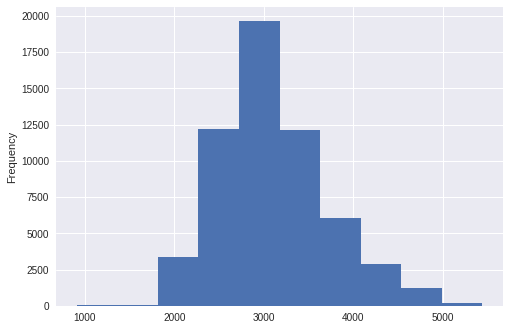

In [0]:
series_deok["DEOK_MW"].plot(kind="hist")
plt.show()

In [0]:
fig = px.histogram(series_deok, 
                   x="DEOK_MW",
                   title='Histograma - Série Temporal - Consumo de Energia - Megawatts (MW)')
fig.show()

### Teste - Augmented Dickey-Fuller

Abaixo está um exemplo de cálculo do teste <b>Augmented Dickey-Fuller</b> no conjunto de dados de consumo de energia. A biblioteca <b>statsmodels</b> fornece a função <b>adfuller()</b> que implementa o teste.

In [0]:
from statsmodels.tsa.stattools import adfuller

X = series_deok["DEOK_MW"]

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -14.913268
p-value: 0.000000


A execução do exemplo imprime o valor estatístico do teste de <b>-14.91</b>. 

Quanto mais negativa essa estatística, maior a probabilidade de rejeitarmos a hipótese nula (temos um conjunto de dados estacionário).

Caso contrário, se não rejeitarmos a hipótese nula (teremos um conjunto não estacionário).
<br><hr><br>
Validando o P-Value temos o valor de <b>0.00</b>, ou seja <br>

<b>Valor 0.00 <= 0,05</b> : Rejeita a hipótese nula (H0), os dados não possuem uma raiz unitária e <b>são estacionários.</b>

### Exercício 2 

Avaliar Estacionariedade a série das ações da Amazon, código <b>AMZN</b>

https://finance.yahoo.com/quote/AMZN%2CAPI/